# Results/plots (lab)

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../src")

import utils.misc as u
import pandas as pd
import altair as alt

In [2]:
# Altair bug fix
# https://github.com/altair-viz/altair/issues/424#issuecomment-340515443
def pd2alt(df):
    return alt.Data(values = df.to_dict("records"))

In [3]:
EXP_NAME = "lab"
TARGET_NAMES = [1, 2, 3, 4, "peak", "peak_wk", "onset_wk"]

In [4]:
def plot_all():
    """
    Plot score over all targets
    """
    
    df = pd.DataFrame({
        "model": [],
        "score": [],
        "target": [],
        "region": []
    })
    for tname in TARGET_NAMES:
        dft = u.get_scores("../results", EXP_NAME, str(tname))
        dft["target"] = str(tname)
        df = pd.concat([df, dft], ignore_index=True)
        
    df = df[df["region"] != "all"]
    df["score"] = -df["score"]
    
    # chart = alt.LayeredChart(pd2alt(df))
    chart = alt.Chart(df).mark_point().encode(
        x=alt.X("mean(score)"), y=alt.Y(
            "model",
            sort=alt.SortField(field="score", op="mean", order="descending")
        ), color="region"
    )
    return chart

## All targets combined

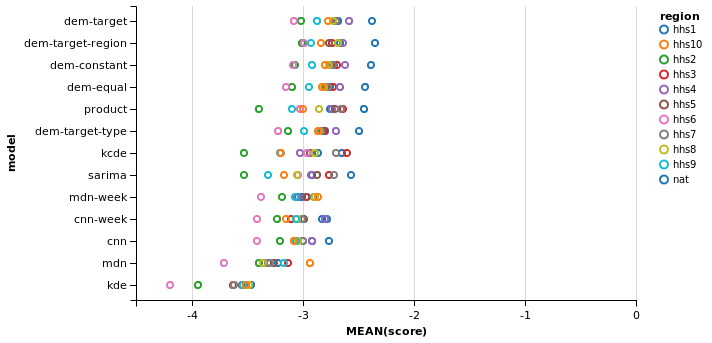

In [5]:
plot_all()

In [6]:
def plot_target_type(target_type):
    """
    Plot score over target type
    """
    
    df = pd.DataFrame({
        "model": [],
        "score": [],
        "target": [],
        "region": []
    })
    valid_targets = {
        "weekly": [1, 2, 3, 4],
        "seasonal": ["peak", "peak_wk", "onset_wk"]
    }
    
    for tname in valid_targets[target_type]:
        dft = u.get_scores("../results", EXP_NAME, str(tname))
        dft["target"] = str(tname)
        df = pd.concat([df, dft], ignore_index=True)
        
    df = df[df["region"] != "all"]
    df["score"] = -df["score"]
    
    # chart = alt.LayeredChart(pd2alt(df))
    chart = alt.Chart(df).mark_point().encode(
        x=alt.X("mean(score)"), y=alt.Y(
            "model",
            sort=alt.SortField(field="score", op="mean", order="descending")
        ), color="region"
    )
    return chart

## All weekly targets

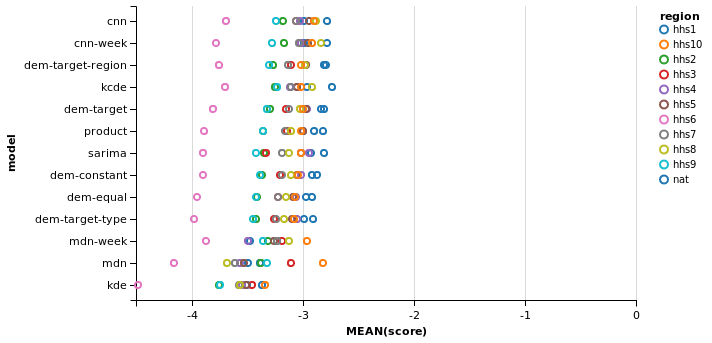

In [7]:
plot_target_type("weekly")

## All seasonal targets

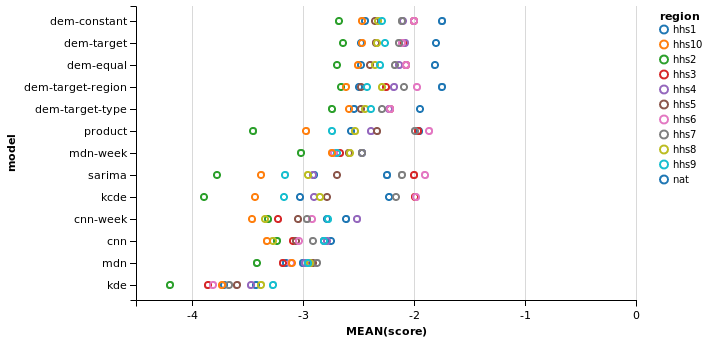

In [8]:
plot_target_type("seasonal")

In [9]:
def plot_target(target):
    """
    Plot scores for the target given
    """
    
    df = u.get_scores("../results", EXP_NAME, str(target))
    # Remove all region
    df = df[df["region"] != "all"]
    df["score"] = -df["score"]
    
    chart = alt.Chart(df).mark_point().encode(
        x="score", y=alt.Y(
            "model",
            sort=alt.SortField(field="score", op="mean", order="descending")
        ), color="region"
    )
    return chart

## 1 week ahead

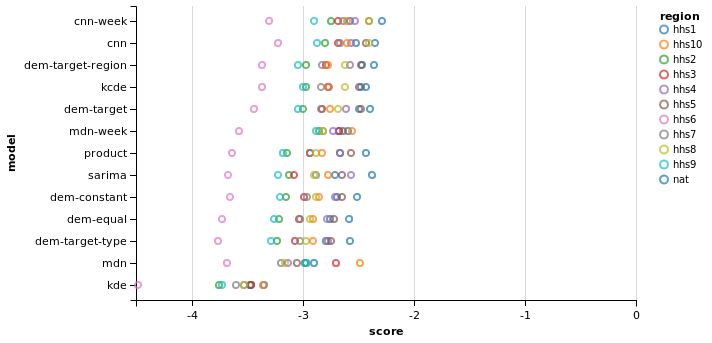

In [10]:
plot_target(1)

## 2 weeks ahead

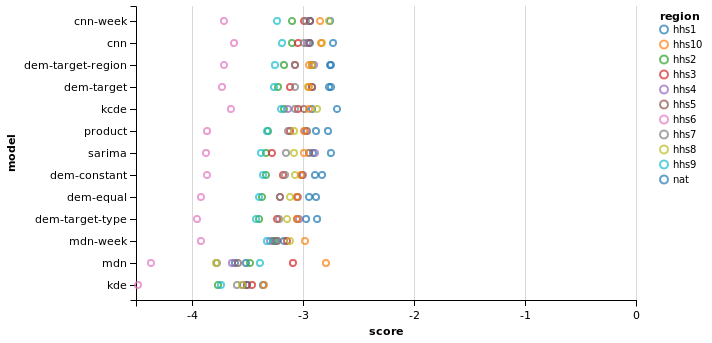

In [11]:
plot_target(2)

## 3 weeks ahead

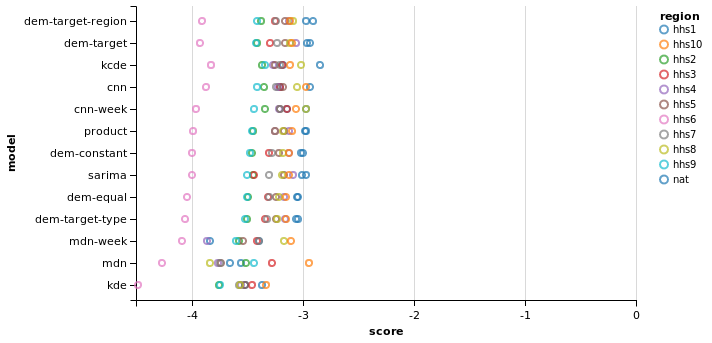

In [12]:
plot_target(3)

## 4 weeks ahead

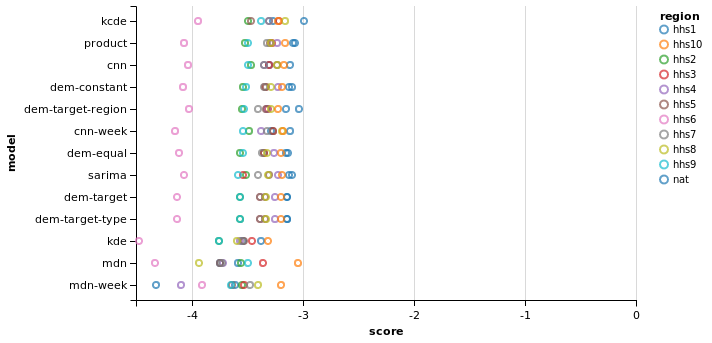

In [13]:
plot_target(4)

## Peak wili

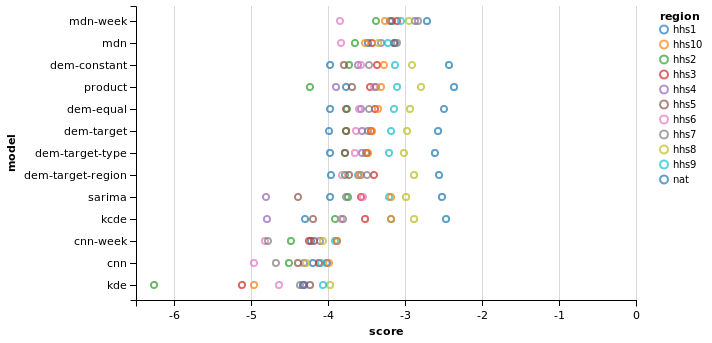

In [14]:
plot_target("peak")

## Peak week

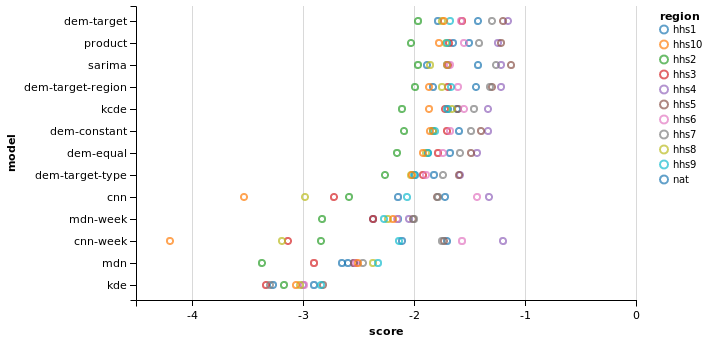

In [15]:
plot_target("peak_wk")

## Onset week

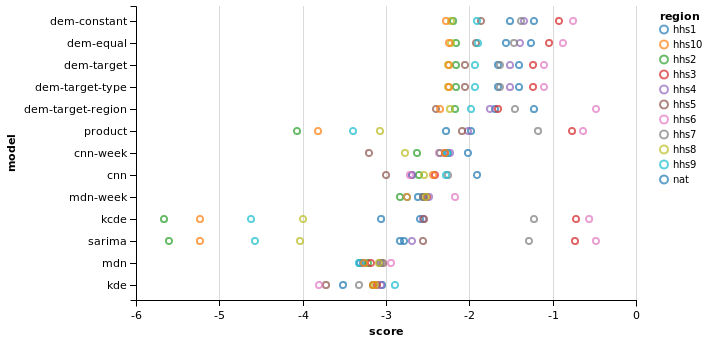

In [16]:
plot_target("onset_wk")